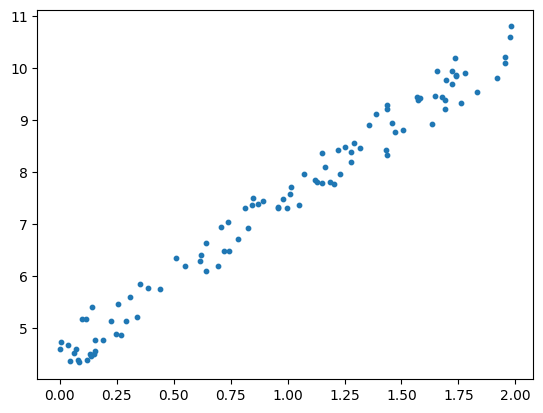

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.scatter(X,y,s=10)
plt.show()

In [2]:
#implementing the normal equation
# (Xt * X)^-1 * Xt * y
X_b = np.c_[np.ones((100,1)),X]
print(X_b)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

[[1.00000000e+00 1.20444432e+00]
 [1.00000000e+00 7.21111827e-01]
 [1.00000000e+00 3.75981685e-02]
 [1.00000000e+00 7.83059421e-01]
 [1.00000000e+00 1.45892317e+00]
 [1.00000000e+00 1.38760596e+00]
 [1.00000000e+00 1.50694842e+00]
 [1.00000000e+00 1.57043848e+00]
 [1.00000000e+00 7.07359876e-01]
 [1.00000000e+00 2.46388638e-01]
 [1.00000000e+00 8.42892736e-01]
 [1.00000000e+00 2.54260660e-01]
 [1.00000000e+00 1.01336817e+00]
 [1.00000000e+00 1.11957252e+00]
 [1.00000000e+00 1.40791762e-01]
 [1.00000000e+00 1.91961688e+00]
 [1.00000000e+00 6.96877875e-01]
 [1.00000000e+00 2.92905296e-01]
 [1.00000000e+00 1.52641445e-01]
 [1.00000000e+00 1.05093584e+00]
 [1.00000000e+00 4.77058990e-02]
 [1.00000000e+00 2.23921607e-01]
 [1.00000000e+00 1.14958265e+00]
 [1.00000000e+00 1.64706014e+00]
 [1.00000000e+00 8.24942927e-01]
 [1.00000000e+00 1.82976728e+00]
 [1.00000000e+00 6.17560483e-01]
 [1.00000000e+00 1.01214804e+00]
 [1.00000000e+00 8.12294068e-01]
 [1.00000000e+00 3.10563998e-01]
 [1.000000

In [3]:
theta_best

array([[4.42950122],
       [3.06736022]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #add x0 = 1
X_new_b

array([[1., 0.],
       [1., 2.]])

In [5]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.42950122],
       [10.56422166]])

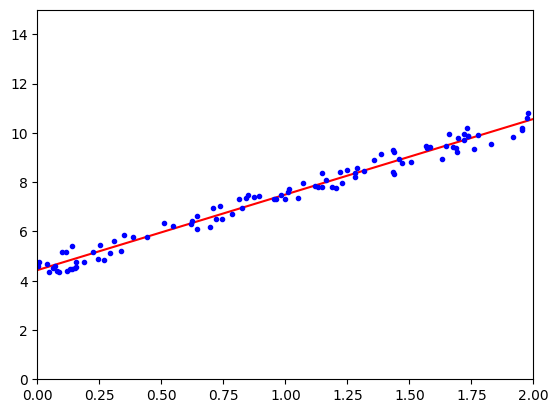

In [6]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [7]:
#same thing but using scikit learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.42950122]), array([[3.06736022]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.42950122],
       [10.56422166]])

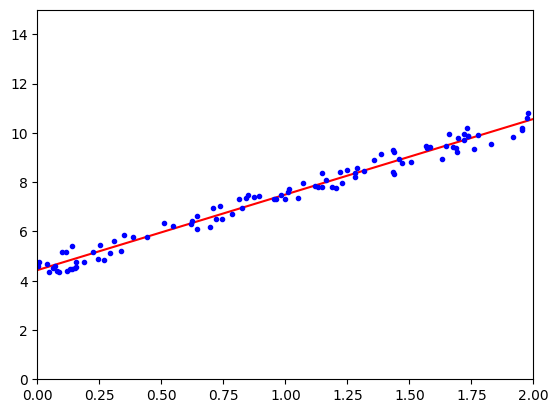

In [9]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [10]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random initialization

#batch gradient descent
for interation in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.42950122],
       [3.06736022]])

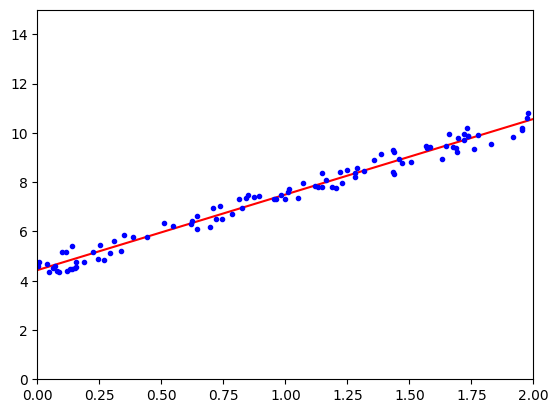

In [11]:
y_predict = X_new_b.dot(theta)
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [12]:
#stochastic gradient descent
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [13]:
theta

array([[4.43852765],
       [3.05627237]])

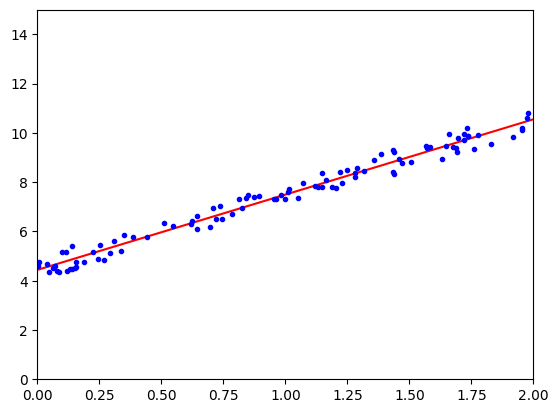

In [14]:
y_predict = X_new_b.dot(theta)
y_predict

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [15]:
#simple stochastic gradient descent using scikit learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.40379556]), array([3.06971389]))

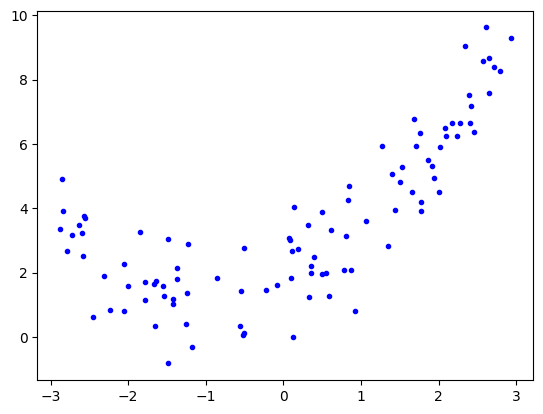

In [17]:
#polynomial regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X,y,'b.')
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.54299149])

In [19]:
X_poly[0]

array([0.54299149, 0.29483976])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.77512148]), array([[1.01639055, 0.54458246]]))

In [21]:
y_pred = lin_reg.predict(X_poly)

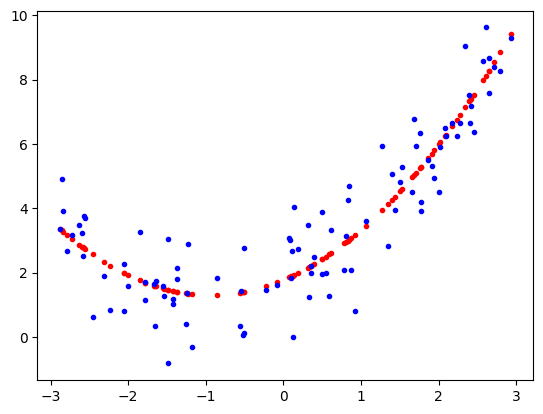

In [22]:
plt.plot(X,y_pred,'r.')
plt.plot(X,y,'b.')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylim(0,3)

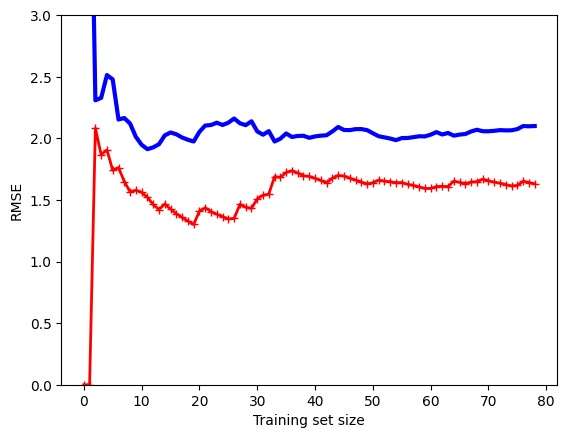

In [39]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

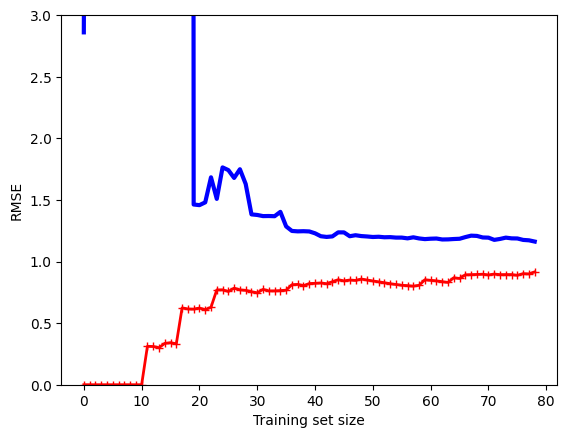

In [47]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y)

In [51]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [61]:
X = iris['data'][:,3:] #petal width
y = (iris['target'] == 2).astype(int) #1 if IRis-Virginica else 0

In [62]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

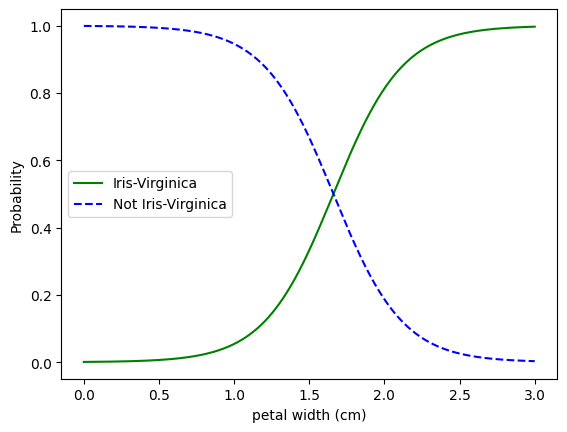

In [63]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel('petal width (cm)')
plt.ylabel('Probability')
plt.legend(loc='center left')

In [64]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [66]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10)

In [67]:
softmax_reg.predict([[5, 2]])

array([2])

In [68]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626372e-07, 5.73689802e-02, 9.42630398e-01]])

In [ ]:
#exercise # 12